In [31]:
# import required library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from io import StringIO
%matplotlib inline

In [32]:
car_data = pd.read_csv("cars.csv")
car_data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [33]:
car_data.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [34]:
# Encoding Target Variable
lb = LabelEncoder()
lb.fit(car_data['brand'])
car_data['brand'] = lb.transform(car_data['brand'])


In [35]:
X = car_data.drop("brand",axis = 1)
y = car_data['brand']

In [36]:
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #20 percent of data will be used for testing purpose

In [37]:
dt_car=DecisionTreeClassifier(criterion='entropy',splitter='best',max_features=3,max_depth=3)
dt_car.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=3)

In [45]:
graph_data=open('graph.dot','w')
export_graphviz(dt_car,out_file=graph_data,filled=True,special_characters=True,
                feature_names=list(X_train.columns),class_names=list(lb.classes_),rounded=True)
graph_data.close()

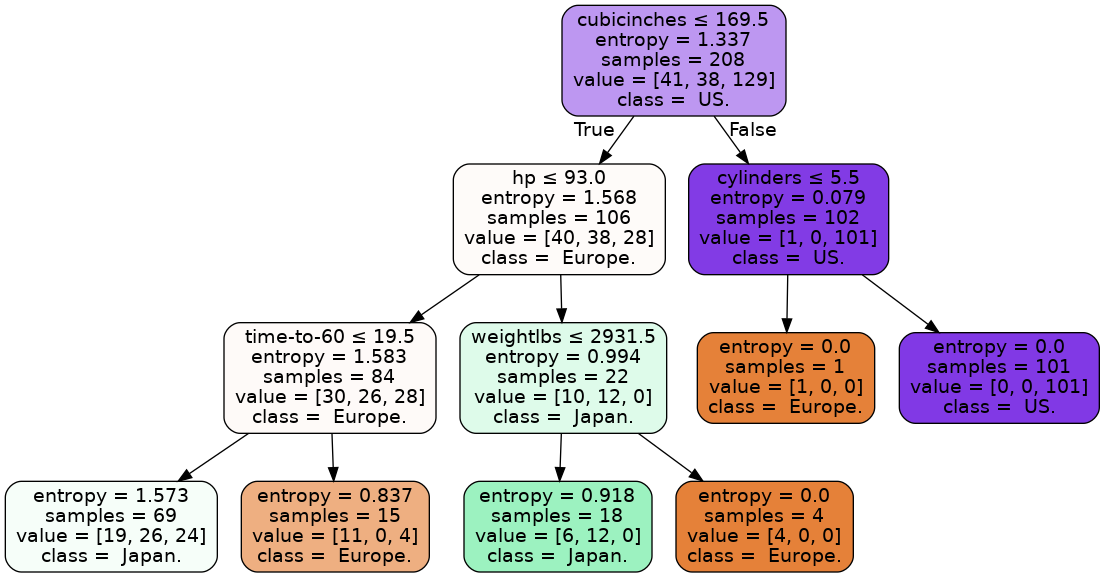

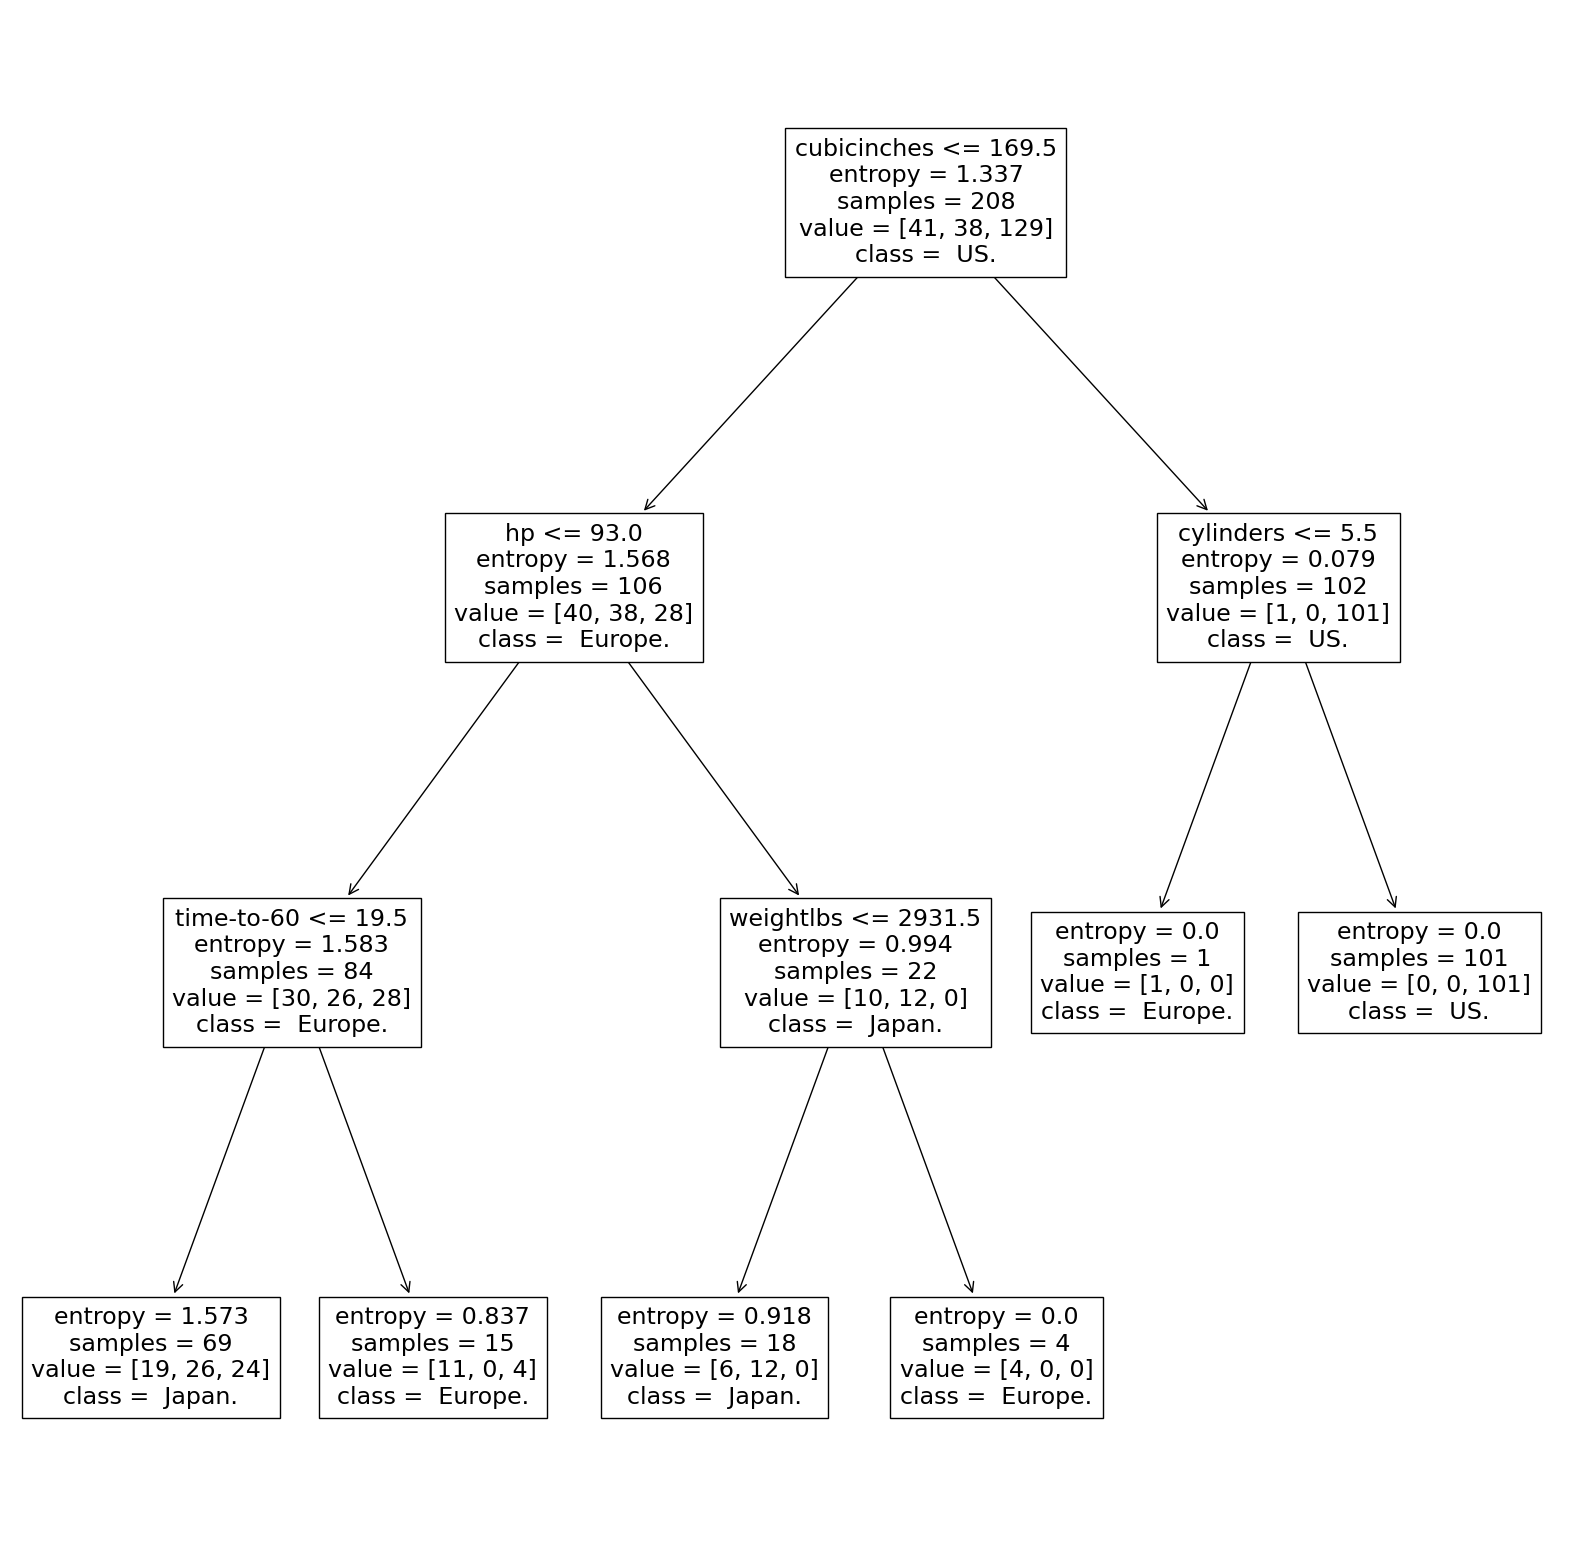

In [39]:
#plot tree can also be used for visualising the tree
plt.figure(figsize=(20,20))
plot_tree(dt_car,class_names=list(lb.classes_),feature_names=list(X_train.columns))
plt.show()

In [40]:
#Calculating accuracy
pred = dt_car.predict(X_test)
print('Accuracy is:',accuracy_score(y_test,pred))

Accuracy is: 0.7169811320754716


In [41]:
'''
- Selecting only the important features
'''
features=pd.DataFrame({'Features':X_train.columns,'Importance':np.round(dt_car.feature_importances_,3)})
features=features.sort_values('Importance',ascending=False)

In [42]:
features

,Features,Importance
2,cubicinches,0.738
5,time-to-60,0.084
3,hp,0.082
1,cylinders,0.058
4,weightlbs,0.038
0,mpg,0.000
6,year,0.000
